<a href="https://colab.research.google.com/github/iam-fern/Generate_addition/blob/main/GQtest_data_add_delta_(_3_2)_n30_05.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/addition_pattern/addition_delta_-3.2'

In [4]:
os.listdir(base_path)

['data_add_delta_-3.2_n20.csv',
 'data_add_delta_-3.2_n30.csv',
 'data_add_delta_-3.2_n60.csv',
 'data_add_delta_-3.2_n120.csv',
 'data_add_delta_-3.2_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_add_delta_-3.2_n30.csv')
pd.read_csv(file_path)

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.949889,92.792084,51.018214,1.197167e-07,250.760187,250.760188,-4.400421e-07
1,0.0,1.0,68.726925,86.142092,38.977054,-1.055074e-06,203.846070,203.846072,-2.071898e-06
2,0.0,2.0,28.125617,94.065802,56.671178,-6.133830e-07,188.862596,188.862596,6.015714e-07
3,0.0,3.0,23.370378,66.091104,20.654239,3.653374e-07,120.115721,120.115722,-1.689887e-06
4,0.0,4.0,68.923906,97.102451,89.124197,-4.993458e-07,265.150554,265.150552,2.063319e-06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.254143,43.022912,36.909271,-2.370188e-06,166.186325,166.186328,-3.335459e-06
29996,999.0,26.0,31.257006,66.927075,39.680663,1.591915e-06,147.864746,147.864751,-4.841652e-06
29997,999.0,27.0,46.947615,97.196596,54.171591,3.722877e-07,208.315802,208.315803,-9.941872e-07
29998,999.0,28.0,87.863787,22.918495,30.280526,-3.115758e-05,151.062778,151.062810,-3.188035e-05


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.949889,92.792084,51.018214,1.197167e-07,250.760187,250.760188,-4.400421e-07
1,0.0,1.0,68.726925,86.142092,38.977054,-1.055074e-06,203.846070,203.846072,-2.071898e-06
2,0.0,2.0,28.125617,94.065802,56.671178,-6.133830e-07,188.862596,188.862596,6.015714e-07
3,0.0,3.0,23.370378,66.091104,20.654239,3.653374e-07,120.115721,120.115722,-1.689887e-06
4,0.0,4.0,68.923906,97.102451,89.124197,-4.993458e-07,265.150554,265.150552,2.063319e-06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.254143,43.022912,36.909271,-2.370188e-06,166.186325,166.186328,-3.335459e-06
29996,999.0,26.0,31.257006,66.927075,39.680663,1.591915e-06,147.864746,147.864751,-4.841652e-06
29997,999.0,27.0,46.947615,97.196596,54.171591,3.722877e-07,208.315802,208.315803,-9.941872e-07
29998,999.0,28.0,87.863787,22.918495,30.280526,-3.115758e-05,151.062778,151.062810,-3.188035e-05


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.949889  92.792084  ...  250.760188 -4.400421e-07
      1.0    68.726925  86.142092  ...  203.846072 -2.071898e-06
      2.0    28.125617  94.065802  ...  188.862596  6.015714e-07
      3.0    23.370378  66.091104  ...  120.115722 -1.689887e-06
      4.0    68.923906  97.102451  ...  265.150552  2.063319e-06
...                ...        ...  ...         ...           ...
999.0 25.0   76.254143  43.022912  ...  166.186328 -3.335459e-06
      26.0   31.257006  66.927075  ...  147.864751 -4.841652e-06
      27.0   46.947615  97.196596  ...  208.315803 -9.941872e-07
      28.0   87.863787  22.918495  ...  151.062810 -3.188035e-05
      29.0   23.463092  69.232599  ...  180.180785 -2.898904e-06

[30000 rows x 7 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.949889  92.792084  ...  250.760188 -4.400421e-07
      1.0    68.726925  86.142092  ...  203.846072 -2.071898e-06
      2.0    28.125617  94.065802  ...  188.862596  6.015714e-07
      3.0    23.370378  66.091104  ...  120.115722 -1.689887e-06
      4.0    68.923906  97.102451  ...  265.150552  2.063319e-06
...                ...        ...  ...         ...           ...
999.0 25.0   76.254143  43.022912  ...  166.186328 -3.335459e-06
      26.0   31.257006  66.927075  ...  147.864751 -4.841652e-06
      27.0   46.947615  97.196596  ...  208.315803 -9.941872e-07
      28.0   87.863787  22.918495  ...  151.062810 -3.188035e-05
      29.0   23.463092  69.232599  ...  180.180785 -2.898904e-06

[30000 rows x 7 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,x2,x3,e,Y,y_hat,e_hat
0,0.0,0.0,96.949889,92.792084,51.018214,1.197167e-07,250.760187,250.760188,-4.400421e-07
1,0.0,1.0,68.726925,86.142092,38.977054,-1.055074e-06,203.846070,203.846072,-2.071898e-06
2,0.0,2.0,28.125617,94.065802,56.671178,-6.133830e-07,188.862596,188.862596,6.015714e-07
3,0.0,3.0,23.370378,66.091104,20.654239,3.653374e-07,120.115721,120.115722,-1.689887e-06
4,0.0,4.0,68.923906,97.102451,89.124197,-4.993458e-07,265.150554,265.150552,2.063319e-06
...,...,...,...,...,...,...,...,...,...
29995,999.0,25.0,76.254143,43.022912,36.909271,-2.370188e-06,166.186325,166.186328,-3.335459e-06
29996,999.0,26.0,31.257006,66.927075,39.680663,1.591915e-06,147.864746,147.864751,-4.841652e-06
29997,999.0,27.0,46.947615,97.196596,54.171591,3.722877e-07,208.315802,208.315803,-9.941872e-07
29998,999.0,28.0,87.863787,22.918495,30.280526,-3.115758e-05,151.062778,151.062810,-3.188035e-05


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         x2  ...       y_hat         e_hat
rep   index                        ...                          
0.0   0.0    96.949889  92.792084  ...  250.760188 -4.400421e-07
      1.0    68.726925  86.142092  ...  203.846072 -2.071898e-06
      2.0    28.125617  94.065802  ...  188.862596  6.015714e-07
      3.0    23.370378  66.091104  ...  120.115722 -1.689887e-06
      4.0    68.923906  97.102451  ...  265.150552  2.063319e-06
...                ...        ...  ...         ...           ...
999.0 25.0   76.254143  43.022912  ...  166.186328 -3.335459e-06
      26.0   31.257006  66.927075  ...  147.864751 -4.841652e-06
      27.0   46.947615  97.196596  ...  208.315803 -9.941872e-07
      28.0   87.863787  22.918495  ...  151.062810 -3.188035e-05
      29.0   23.463092  69.232599  ...  180.180785 -2.898904e-06

[30000 rows x 7 columns]

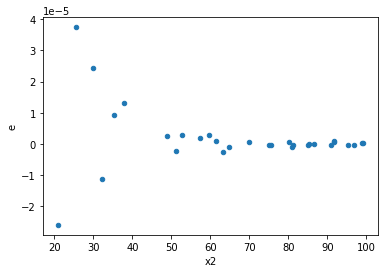

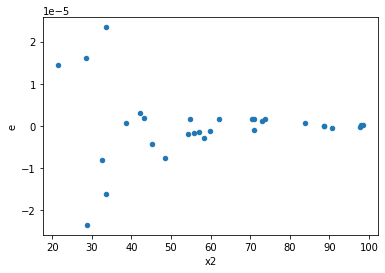

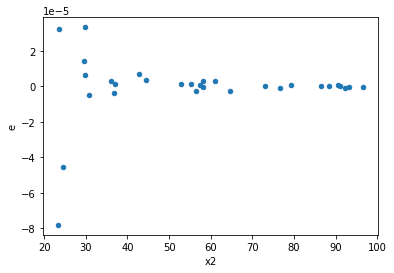

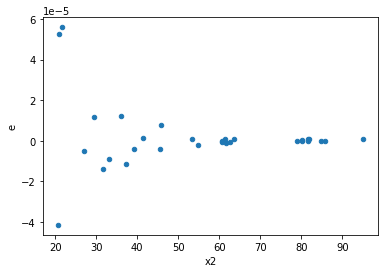

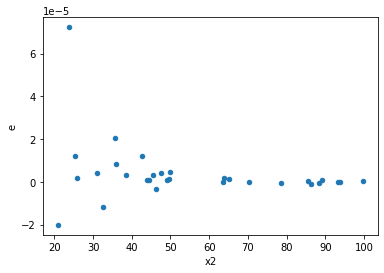

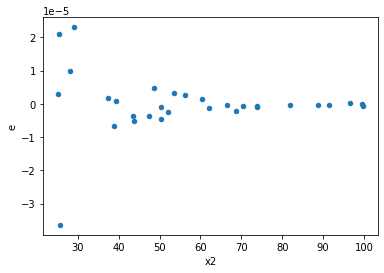

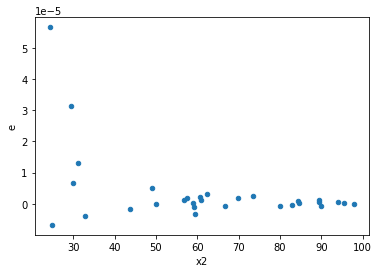

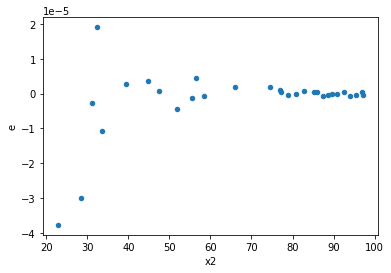

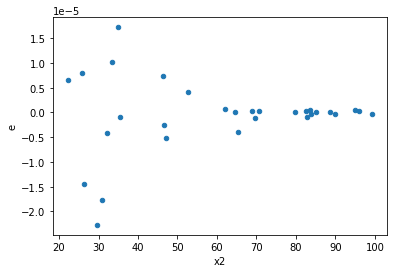

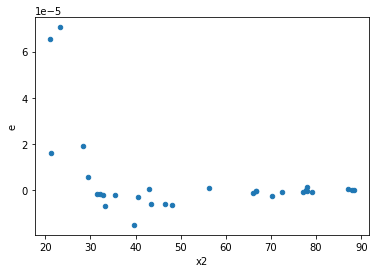

In [12]:
tablenew0 = table.loc[10.0]
tablenew1 = table.loc[11.0]
tablenew2 = table.loc[12.0]
tablenew3 = table.loc[13.0]
tablenew4 = table.loc[14.0]
tablenew5 = table.loc[15.0]
tablenew6 = table.loc[16.0]
tablenew7 = table.loc[17.0]
tablenew8 = table.loc[18.0]
tablenew9 = table.loc[19.0]
tablenew0.plot(x ='x2', y='e', kind = 'scatter')
tablenew1.plot(x ='x2', y='e', kind = 'scatter')
tablenew2.plot(x ='x2', y='e', kind = 'scatter')
tablenew3.plot(x ='x2', y='e', kind = 'scatter')
tablenew4.plot(x ='x2', y='e', kind = 'scatter')
tablenew5.plot(x ='x2', y='e', kind = 'scatter')
tablenew6.plot(x ='x2', y='e', kind = 'scatter')
tablenew7.plot(x ='x2', y='e', kind = 'scatter')
tablenew8.plot(x ='x2', y='e', kind = 'scatter')
tablenew9.plot(x ='x2', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม x1
    new_table_sort = new_table.sort_values('x2')
    new_table_sort.reset_index(inplace=True)
    new_table_sort.drop(['index'], axis=1, inplace=True)


    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1', 'x2', 'x3']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = model1.mse_resid


    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1', 'x2', 'x3']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = model2.mse_resid

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)


    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # sf(x, dfn, dfd, loc=0, scale=1) : Survival function (also defined as 1 - cdf, but sf is sometimes more accurate)
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))

    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    
    return df2, df1, SSE2, SSE1, MSE2, MSE1, GQ_test, two_tailed, p_greater

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)

In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,Result_test
Replicate,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.05
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater"]].apply(lambda value: value[0] if value[0]<0.5 else 2*value[1], axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject005=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject005=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater"])
result_show.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,9.0,9.0,1.8960959888789675e-12,4.0993083173541e-10,2.3701199860987094e-13,5.124135396692625e-11,0.004625404683155922,3.985371143488325e-09,Reject005=0 : Heteroscedasticity
1.0,9.0,9.0,5.9994673769386e-12,3.0927414854872273e-09,7.49933422117325e-13,3.865926856859034e-10,0.0019398541407651634,8.143541477479955e-11,Reject005=0 : Heteroscedasticity
2.0,9.0,9.0,2.2390219598156824e-12,9.506087039714944e-10,2.798777449769603e-13,1.188260879964368e-10,0.002355356047616016,1.9443810343491303e-10,Reject005=0 : Heteroscedasticity
3.0,9.0,9.0,1.6957741801945352e-11,2.0109940183690315e-09,2.119717725243169e-12,2.5137425229612893e-10,0.0084325172760576,5.78114865238848e-08,Reject005=0 : Heteroscedasticity
4.0,9.0,9.0,2.1548637808044113e-12,3.914880630171722e-10,2.693579726005514e-13,4.8936007877146525e-11,0.005504289873354045,8.662748092695848e-09,Reject005=0 : Heteroscedasticity
5.0,9.0,9.0,3.5130658505624975e-12,1.960061068045301e-09,4.391332313203122e-13,2.4500763350566263e-10,0.001792324692243366,5.7108190298316005e-11,Reject005=0 : Heteroscedasticity
6.0,9.0,9.0,2.233255670572631e-12,6.29506399626086e-10,2.7915695882157887e-13,7.868829995326074e-11,0.0035476298126582034,1.2174428994227803e-09,Reject005=0 : Heteroscedasticity
7.0,9.0,9.0,4.967720988086074e-12,1.7366713403524696e-10,6.209651235107593e-13,2.170839175440587e-11,0.02860484233636193,1.2188753798058675e-05,Reject005=0 : Heteroscedasticity
8.0,9.0,9.0,4.5818315760112196e-12,6.198116247278479e-09,5.727289470014024e-13,7.747645309098099e-10,0.0007392296938643333,1.0695318647940431e-12,Reject005=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject005=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64